In [1]:
#import required libraries
import numpy as np   #library of matrix operations
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# Linear Regression

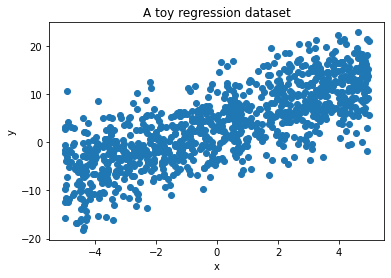

In [3]:
#create a dataset
b = 3
m = 2
M = 1000
#generate N(0, 5) noise
eps = np.random.normal(0, 5, M)
x = np.random.uniform(-5, 5, M)
y = (b + m*x) + eps   #y = w^Tx + noise
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("A toy regression dataset")
plt.show()

**(a) Closed form Solution**

In [4]:
#we want y_hat = w_0 + w_1*x_1, (y_hat ~ y)
#Way 1: using exact equation for (x^T x)^-1 x^T y
#augnment x as a (ones, x1): (Mx2)
ones = np.ones(M).reshape(M, 1)
x1 = x.reshape(M, 1)
y1 = y.reshape(M, 1)
X = np.concatenate([ones, x1], axis=1)

Xt_X = np.linalg.inv(np.matmul(X.T, X))  #(x^Tx)^-1
w_hat = np.matmul(np.matmul(Xt_X, X.T), y1) # (x^Tx)^-1(X^T y)
print(w_hat)

[[3.15758333]
 [2.01647864]]


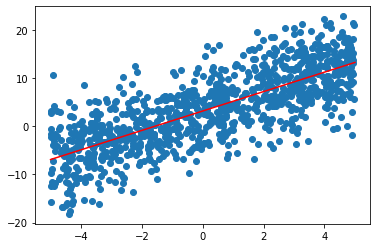

In [5]:
def plot_curve(x, y, w_hat):
    plt.scatter(x, y)
    x_hat = np.linspace(-5, 5, 1000)
    y_hat = w_hat[0, 0] + w_hat[1, 0]*x_hat
    plt.plot(x_hat, y_hat, '-r')
plot_curve(x, y, w_hat)

**(b) Gradient descent Solution**

In [6]:
#with gradient descent
def loss_f(X, w, y):
    D = (X@w - y)  # ||y\hat - y||^2  = (y\hat - y)^T(y_hat - y)
    #vectorized
    return ((0.5* D.T @  D)/len(y)).squeeze()

def gradient(X, w, y):
    #vectorized implementation: parallelize in numpy
    return (X.T @ (X@w-y))/len(y)

In [7]:
def learn_params(X, y, lr, num_epochs):
    w = np.zeros(shape=(2, 1))
    loss = []
    for i in range(num_epochs):
        w = w - lr*gradient(X, w, y)
        loss.append(loss_f(X, w, y))
    return w, loss

w, loss = learn_params(X, y1, 0.2, 100)
print(w)

[[3.15758333]
 [2.01647864]]


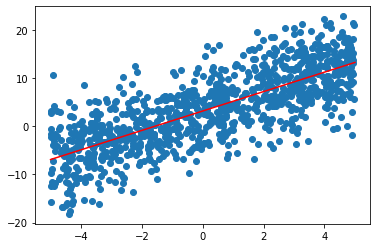

In [8]:
plot_curve(x, y, w)

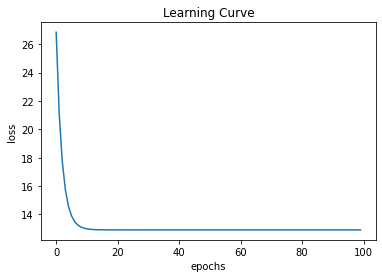

In [9]:
plt.plot(loss)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Learning Curve")
plt.show()

**(c) Mind the learning rate and number of steps!**

In [10]:
w, loss = learn_params(X, y1, 0.002, 100)
print(w)

[[0.59947555]
 [1.71560647]]


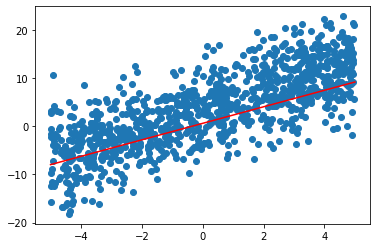

In [11]:
plot_curve(x, y, w)

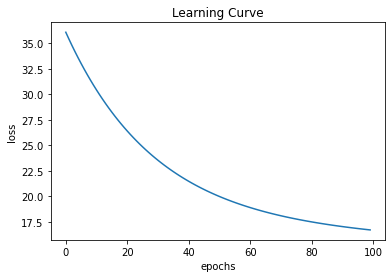

In [12]:
plt.plot(loss)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Learning Curve")
plt.show()

[[3.15758332]
 [2.01647864]]


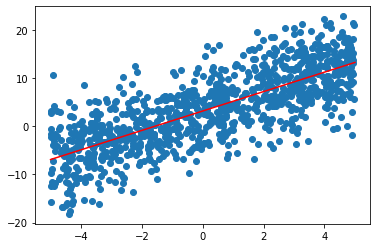

In [13]:
w, loss = learn_params(X, y1, 0.002, 10000)
print(w)
plot_curve(x, y, w)

**(d) Large number of steps!**

In [14]:
w, loss = learn_params(X, y1, 0.002, 20000)
print(w)

[[3.15758333]
 [2.01647864]]


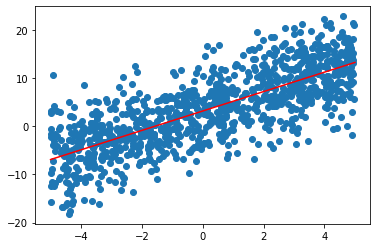

In [15]:
plot_curve(x, y, w)

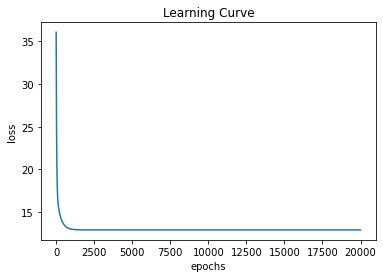

In [16]:
plt.plot(loss)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Learning Curve")
plt.show()

**(d) Very large learning rate: oscillates and won't converge!**

In [17]:
w, loss = learn_params(X, y1, 2, 200)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_29864\2875875598.py:5: RuntimeWarning: overflow encountered in matmul
  return ((0.5* D.T @  D)/len(y)).squeeze()


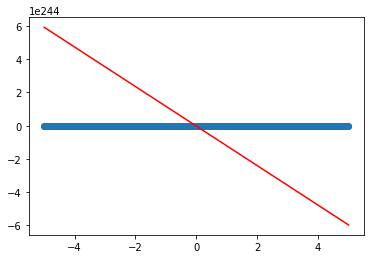

In [18]:
plot_curve(x, y, w)